In [1]:
#Import the libraries that will be used
import pandas as pd
import glob
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
#set up the pathway for the water level file
path = 'Data\\'

#Making a datframe out of the file
glwl_raw = pd.read_csv(path+'GLHYD_data_metric.csv')

In [3]:
#From here I need to rename the column names and remove the first 12 rows as they are not data
glwl_cleaned = glwl_raw[12:]
header_list = ['month','year','Superior','Michigan-Huron','St_Clair','Erie','Ontario']
glwl_cleaned.columns = header_list
glwl_cleaned

,month,year,Superior,Michigan-Huron,St_Clair,Erie,Ontario
12,jan,1918,183.25,176.71,174.59,173.9,74.74
13,feb,1918,183.2,176.73,174.74,173.82,74.72
14,mar,1918,183.17,176.8,174.74,174.01,74.92
15,apr,1918,183.14,176.89,174.84,174.02,75.1
16,may,1918,183.22,176.99,175,173.98,75.09
...,...,...,...,...,...,...,...
1231,aug,2019,183.86,177.32,175.96,175.02,75.53
1232,sep,2019,183.86,177.27,175.86,174.87,75.24
1233,oct,2019,183.88,177.29,175.77,174.74,75.04
1234,nov,2019,183.81,177.26,175.71,174.68,75.04


In [4]:
#The next thing I need to deal with is the data is non object type, so i need to convert the year and lake data to numberic
to_numeric = {'year':int,'Superior':float,'Michigan-Huron':float,'St_Clair':float,'Erie':float,'Ontario':float}
glwl_cleaned = glwl_cleaned.astype(to_numeric)
glwl_cleaned.head()

,month,year,Superior,Michigan-Huron,St_Clair,Erie,Ontario
12,jan,1918,183.25,176.71,174.59,173.90,74.74
13,feb,1918,183.20,176.73,174.74,173.82,74.72
14,mar,1918,183.17,176.80,174.74,174.01,74.92
15,apr,1918,183.14,176.89,174.84,174.02,75.10
16,may,1918,183.22,176.99,175.00,173.98,75.09


In [20]:
#What I want to do next is take the yearly average. This will be fairly simple as I can use groupby
glwl_yearly = glwl_cleaned.groupby('year')['Superior','Michigan-Huron','St_Clair','Erie','Ontario'].mean()
glwl_yearly = glwl_yearly.reset_index()
glwl_yearly.head()

#As this represents the cleaned data, I'm going to save it as a csv
glwl_yearly.to_csv(path+'GLHYD_data_metric_rolling.csv')

In [6]:
#Now that my dataframe is cleaned up, I need to make some variables to make the reast of the ploting easier to read
#First my x-axis value which is just the year
year_var = glwl_yearly['year']

#I am going to make 5 graphs, 1 for each lake that is measured, so they all need variables
su_var = glwl_yearly['Superior']
mh_var = glwl_yearly['Michigan-Huron']
sc_var = glwl_yearly['St_Clair']
er_var = glwl_yearly['Erie']
ot_var = glwl_yearly['Ontario']

#On top of the yearly data i want to have a rolling average so i need to have a variable for that as well. 
su_rolling_3 = glwl_yearly['Superior'].rolling(window=3).mean()
mh_rolling_3 = glwl_yearly['Michigan-Huron'].rolling(window=3).mean()
sc_rolling_3 = glwl_yearly['St_Clair'].rolling(window=3).mean()
er_rolling_3 = glwl_yearly['Erie'].rolling(window=3).mean()
ot_rolling_3 = glwl_yearly['Ontario'].rolling(window=3).mean()

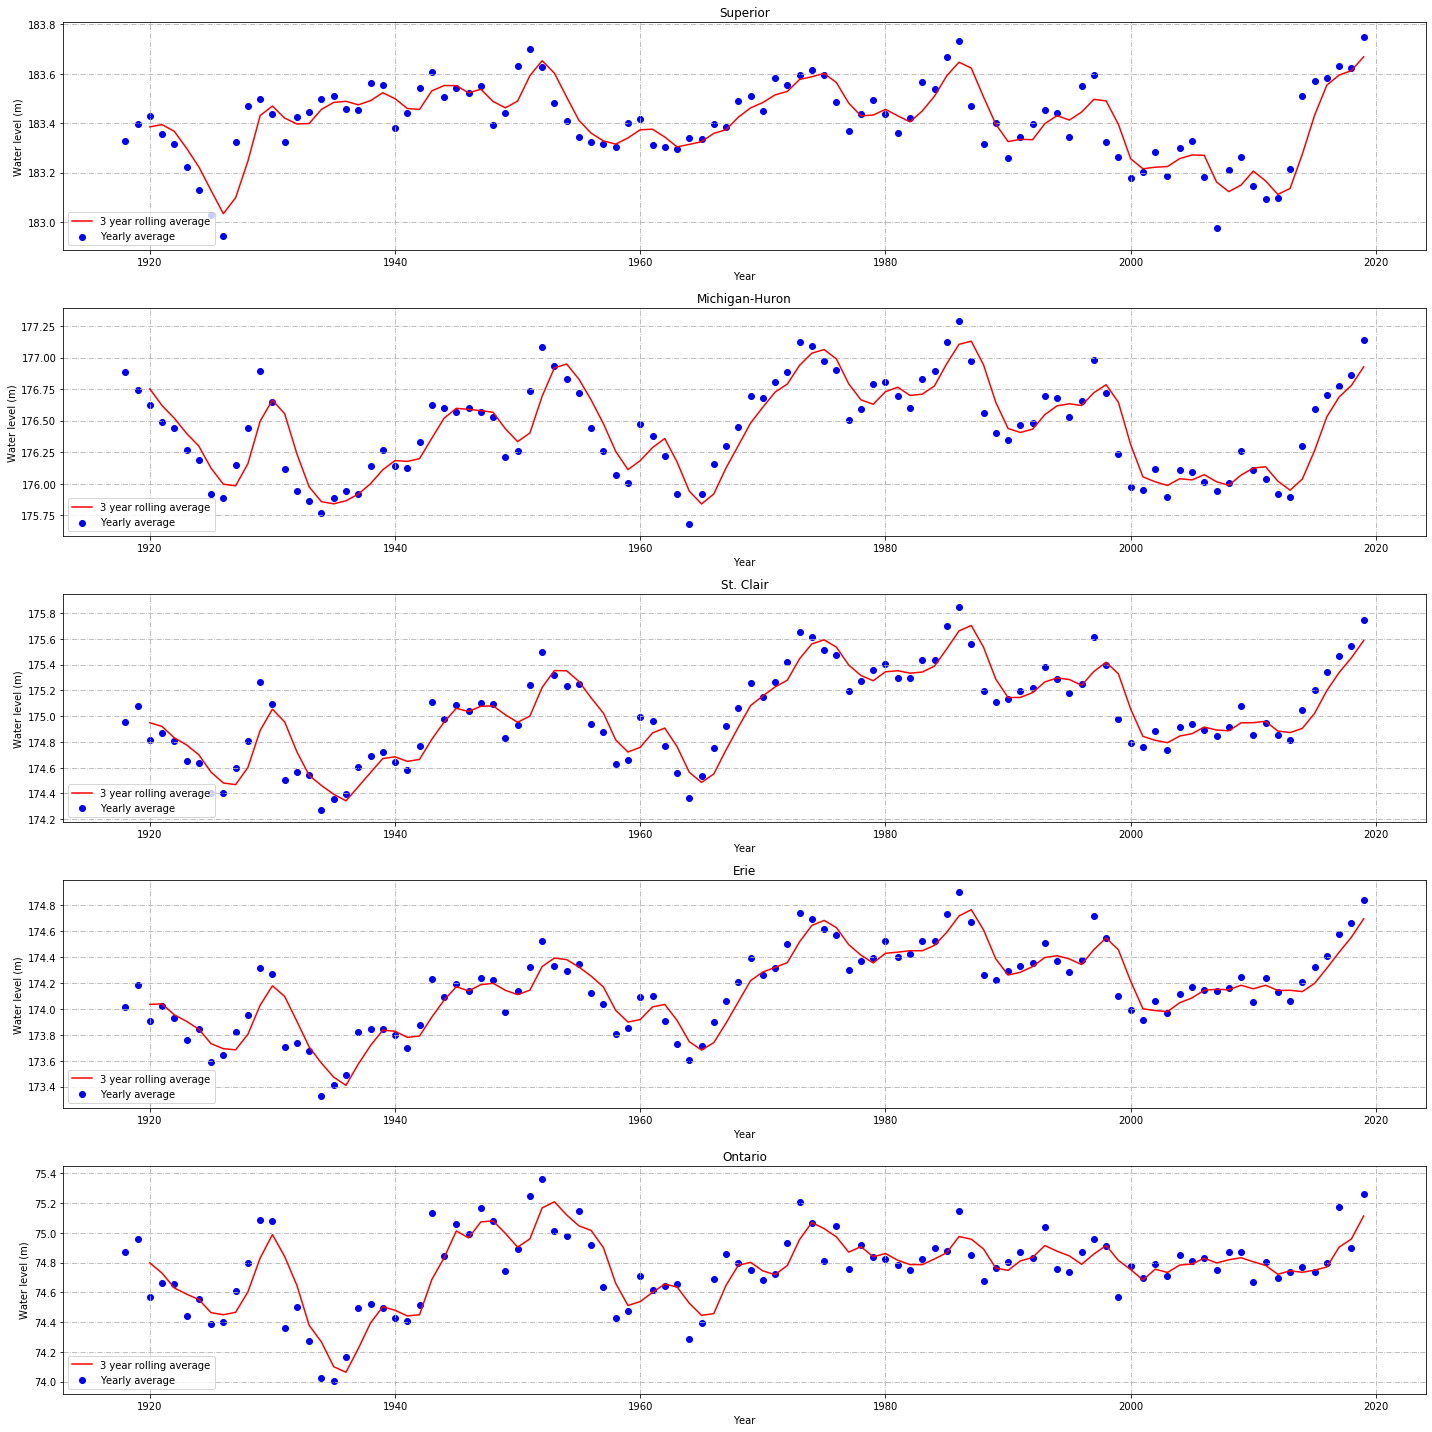

In [7]:
#My first graph is going to be a 5x1 subplot of the 5 bodies of water listed 
fig_lakelevels, ((ax1),(ax2),(ax3),(ax4),(ax5)) = plt.subplots(5,1,figsize=(20,20))

#Next is setting up the plots for all the subplots. They are all basically copies of each other just using different variables
#First I am setting up that it will be a scatter plot, passing the x and y, setting the color and label
#Then I am plotting the rolling average
#Next two lines I am telling it where I want the legend and and what to title the labels
#Final step for the subplots is to set up a grid to read better
ax1.scatter(year_var,su_var,c='b',label='Yearly average')
ax1.plot(year_var,su_rolling_3,c='r', label="3 year rolling average")
ax1.legend(loc='lower left')
ax1.set(xlabel='Year',ylabel='Water level (m)',title='Superior')
ax1.grid(linestyle = '-.')

ax2.scatter(year_var,mh_var,c='b',label='Yearly average')
ax2.plot(year_var,mh_rolling_3,c='r', label="3 year rolling average")
ax2.legend(loc='lower left')
ax2.set(xlabel='Year',ylabel='Water level (m)',title='Michigan-Huron')
ax2.grid(linestyle = '-.')

ax3.scatter(year_var,sc_var,c='b',label='Yearly average')
ax3.plot(year_var,sc_rolling_3,c='r', label="3 year rolling average")
ax3.legend(loc='lower left')
ax3.set(xlabel='Year',ylabel='Water level (m)',title='St. Clair')
ax3.grid(linestyle = '-.')

ax4.scatter(year_var,er_var,c='b',label='Yearly average')
ax4.plot(year_var,er_rolling_3,c='r', label="3 year rolling average")
ax4.legend(loc='lower left')
ax4.set(xlabel='Year',ylabel='Water level (m)',title='Erie')
ax4.grid(linestyle = '-.')

ax5.scatter(year_var,ot_var,c='b',label='Yearly average')
ax5.plot(year_var,ot_rolling_3,c='r', label="3 year rolling average")
ax5.legend(loc='lower left')
ax5.set(xlabel='Year',ylabel='Water level (m)',title='Ontario')
ax5.grid(linestyle = '-.')

#I add this in to space the subplots out so the name of the lake is not overlapped wwith the label of the above graph
fig_lakelevels.tight_layout()

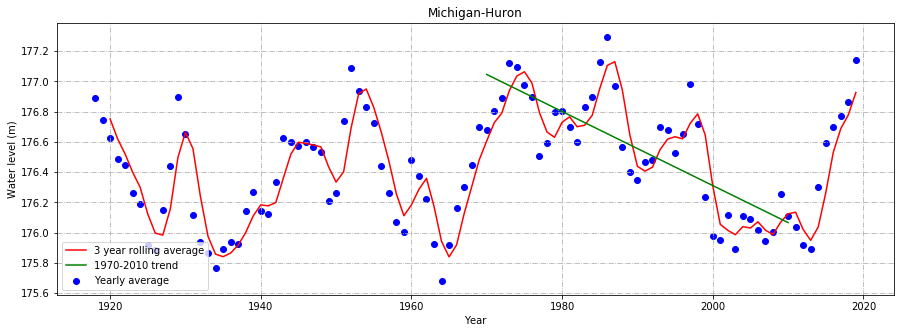

In [32]:
#What I want to do for this next section is to have a trend line from 1970 to 2010 ands add that to a graph of lake michigan/huron
#First I need to setup the data frame
glwl_trend = glwl_yearly[(glwl_yearly['year'] >= 1970) & (glwl_yearly['year'] <= 2010)]

#Now that i have the filtered database I want, I can calculate the slope of the trend line
slope, intercept, r_value, p_value, std_err = st.linregress(glwl_trend['year'],glwl_trend['Michigan-Huron'])

#Now I can recreate the michigan-huron graph in insert the trend line
fig_m_h_trend, (ax1) = plt.subplots(1,1,figsize=(15,5))

ax1.scatter(year_var,mh_var,c='b',label='Yearly average')
ax1.plot(year_var,mh_rolling_3,c='r', label="3 year rolling average")
ax1.plot(glwl_trend['year'],slope*glwl_trend['year'] + intercept, color='g',label="1970-2010 trend")
ax1.legend(loc='lower left')
ax1.set(xlabel='Year',ylabel='Water level (m)',title='Michigan-Huron')
ax1.grid(linestyle = '-.')

In [33]:
fig_m_h_trend.savefig('m_h_trend.png')

In [23]:
#I want to experiement with a new type of rolling average
#set up the pathway for the water level file
path = 'Data\\'

#Making a datframe out of the file
glwl_rolling_raw = pd.read_csv(path+'GLHYD_data_metric_rolling.csv')

In [24]:
#On top of the yearly data i want to have a rolling average so i need to have a variable for that as well. 
su_rolling_3_2 = glwl_rolling_raw['Superior-r']
mh_rolling_3_2 = glwl_rolling_raw['Michigan-Huron-r']
sc_rolling_3_2 = glwl_rolling_raw['St_Clair-r']
er_rolling_3_2 = glwl_rolling_raw['Erie-r']
ot_rolling_3_2 = glwl_rolling_raw['Ontario-r']

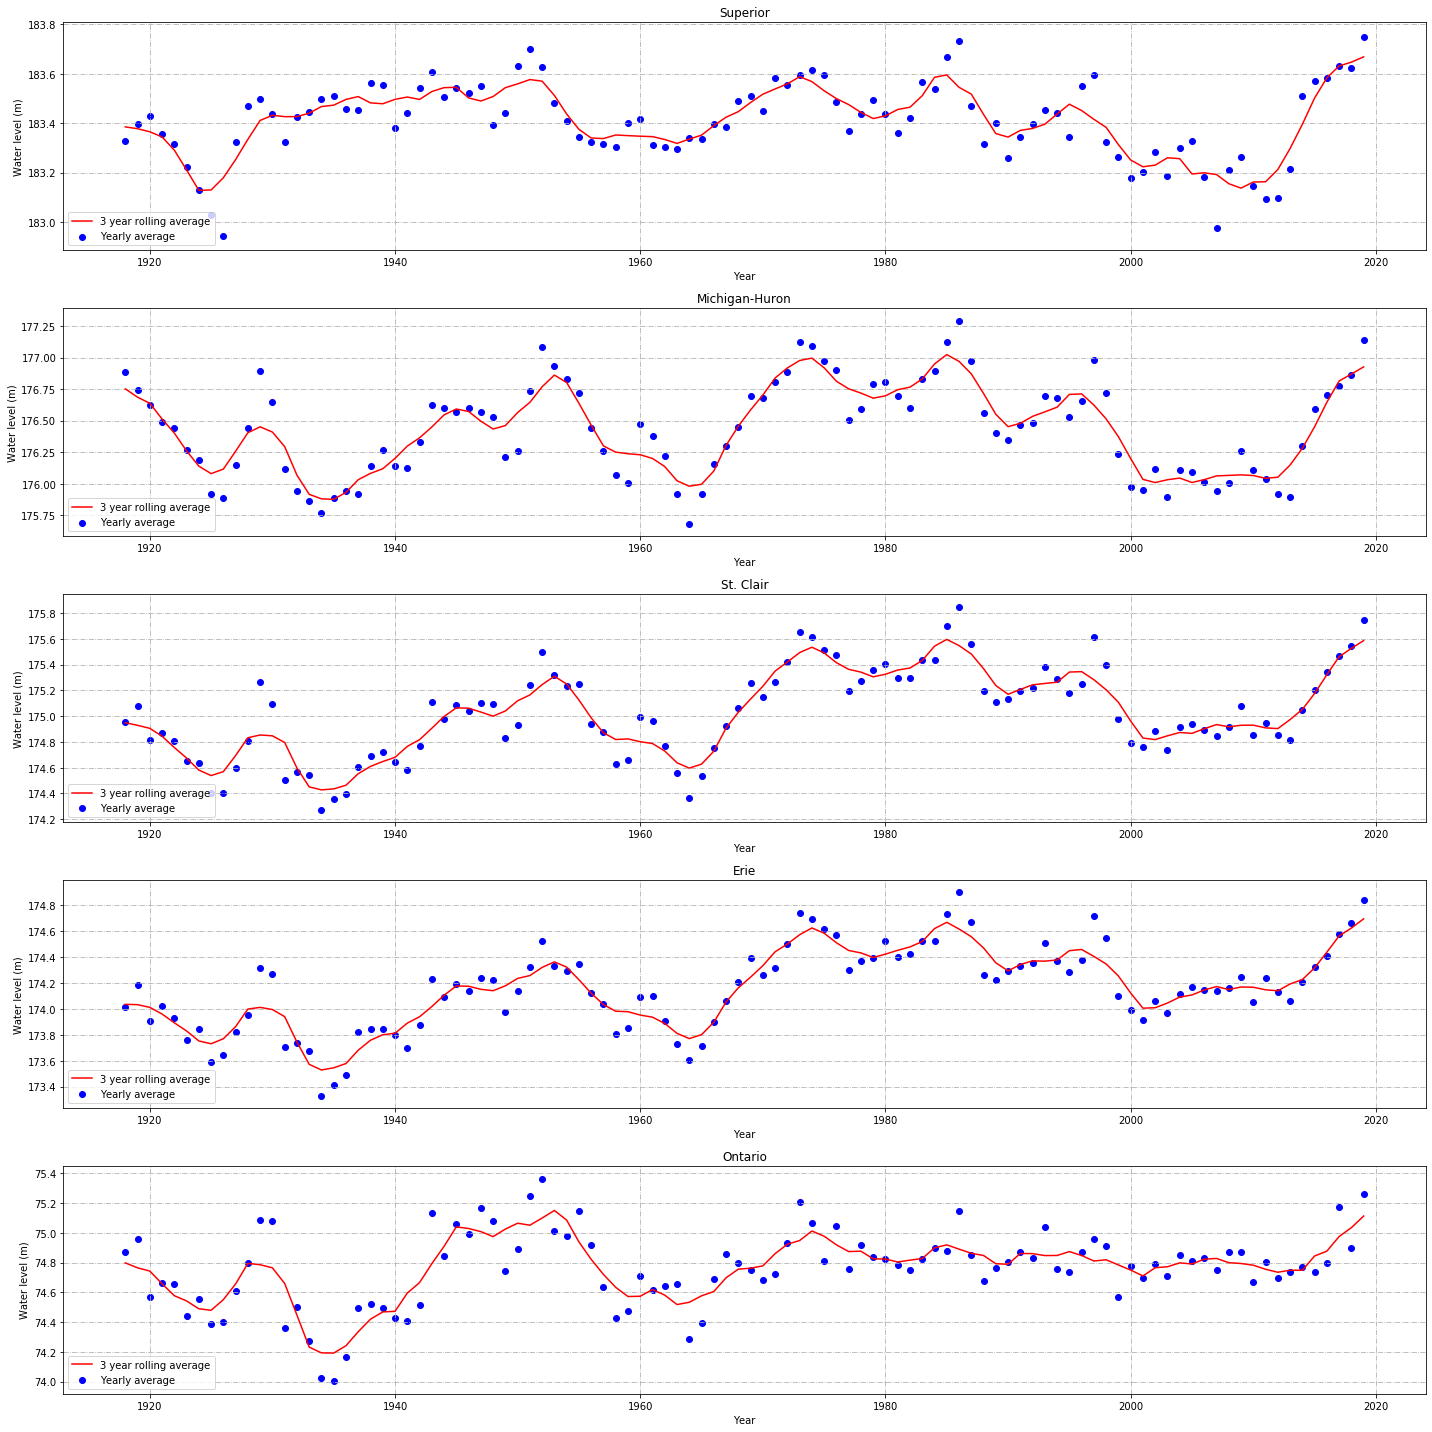

In [27]:
#My first graph is going to be a 5x1 subplot of the 5 bodies of water listed 
fig_lakelevels_2, ((ax1),(ax2),(ax3),(ax4),(ax5)) = plt.subplots(5,1,figsize=(20,20))

#Next is setting up the plots for all the subplots. They are all basically copies of each other just using different variables
#First I am setting up that it will be a scatter plot, passing the x and y, setting the color and label
#Then I am plotting the rolling average
#Next two lines I am telling it where I want the legend and and what to title the labels
#Final step for the subplots is to set up a grid to read better
ax1.scatter(year_var,su_var,c='b',label='Yearly average')
ax1.plot(year_var,su_rolling_3_2,c='r', label="3 year rolling average")
ax1.legend(loc='lower left')
ax1.set(xlabel='Year',ylabel='Water level (m)',title='Superior')
ax1.grid(linestyle = '-.')

ax2.scatter(year_var,mh_var,c='b',label='Yearly average')
ax2.plot(year_var,mh_rolling_3_2,c='r', label="3 year rolling average")
ax2.legend(loc='lower left')
ax2.set(xlabel='Year',ylabel='Water level (m)',title='Michigan-Huron')
ax2.grid(linestyle = '-.')

ax3.scatter(year_var,sc_var,c='b',label='Yearly average')
ax3.plot(year_var,sc_rolling_3_2,c='r', label="3 year rolling average")
ax3.legend(loc='lower left')
ax3.set(xlabel='Year',ylabel='Water level (m)',title='St. Clair')
ax3.grid(linestyle = '-.')

ax4.scatter(year_var,er_var,c='b',label='Yearly average')
ax4.plot(year_var,er_rolling_3_2,c='r', label="3 year rolling average")
ax4.legend(loc='lower left')
ax4.set(xlabel='Year',ylabel='Water level (m)',title='Erie')
ax4.grid(linestyle = '-.')

ax5.scatter(year_var,ot_var,c='b',label='Yearly average')
ax5.plot(year_var,ot_rolling_3_2,c='r', label="3 year rolling average")
ax5.legend(loc='lower left')
ax5.set(xlabel='Year',ylabel='Water level (m)',title='Ontario')
ax5.grid(linestyle = '-.')

#I add this in to space the subplots out so the name of the lake is not overlapped wwith the label of the above graph
fig_lakelevels_2.tight_layout()

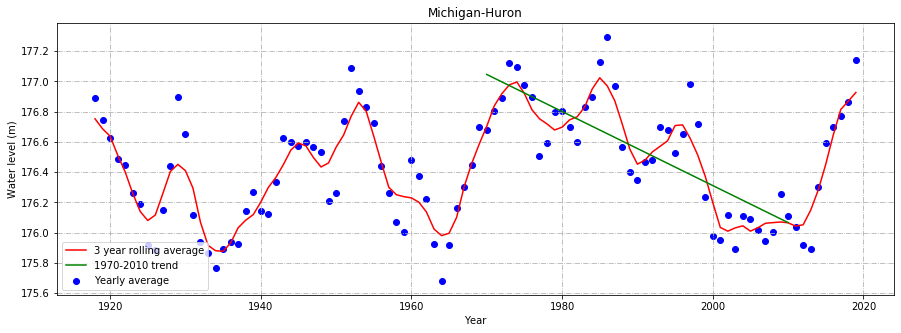

In [29]:
#What I want to do for this next section is to have a trend line from 1970 to 2010 ands add that to a graph of lake michigan/huron
#First I need to setup the data frame
glwl_trend = glwl_yearly[(glwl_yearly['year'] >= 1970) & (glwl_yearly['year'] <= 2010)]

#Now that i have the filtered database I want, I can calculate the slope of the trend line
slope, intercept, r_value, p_value, std_err = st.linregress(glwl_trend['year'],glwl_trend['Michigan-Huron'])

#Now I can recreate the michigan-huron graph in insert the trend line
fig_m_h_trend_2, (ax1) = plt.subplots(1,1,figsize=(15,5))

ax1.scatter(year_var,mh_var,c='b',label='Yearly average')
ax1.plot(year_var,mh_rolling_3_2,c='r', label="3 year rolling average")
ax1.plot(glwl_trend['year'],slope*glwl_trend['year'] + intercept, color='g',label="1970-2010 trend")
ax1.legend(loc='lower left')
ax1.set(xlabel='Year',ylabel='Water level (m)',title='Michigan-Huron')
ax1.grid(linestyle = '-.')

In [30]:
fig_lakelevels_2.savefig('lakelevels_2.png')
fig_m_h_trend_2.savefig('m_h_trend_2.png')

In [ ]:
#Water level data recieved from
#https://www.lre.usace.army.mil/Missions/Great-Lakes-Information/Great-Lakes-Information-2/Water-Level-Data/